# Solve a Linear System with LU decomposition

In [1]:
import time
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("Ready.")

Ready.


### Compute the speedups of using LUD in solving a Linear System

In [2]:
ds = [2,5,10,100,200,300,500,1000,2000,5000,10000]

In [3]:
speedups = []
for d in ds:
    n_trial = 5
    As = [np.random.randn(d,d) for _ in range(n_trial)]
    bs = [np.random.randn(d) for _ in range(n_trial)]
    t_start = time.time()
    for A,b in zip(As,bs):
        X2 = np.linalg.solve(A,b)
    esec_solve = time.time() - t_start
    print ("np.linalg.solve took [%.3e]"%(esec_solve))
    t_start = time.time()
    for A,b in zip(As,bs):
        lu, piv = la.lu_factor(A)
    esec_lu = time.time() - t_start
    print ("la.lu_factor took [%.3e]"%(esec_lu))
    t_start = time.time()
    for A,b in zip(As,bs):
        x = la.lu_solve((lu, piv), b)
    esec_lusolve = time.time() - t_start
    speedup = esec_solve/esec_lusolve
    print ("la.lu_solve took [%.3e]. It is [%.1f] times faster than the naive version."%
           (esec_lusolve,speedup))
    speedups.append(speedup)
print ("Done.")

np.linalg.solve took [1.101e-04]
la.lu_factor took [6.919e-04]
la.lu_solve took [1.783e-04]. It is [0.6] times faster than the naive version.
np.linalg.solve took [1.559e-04]
la.lu_factor took [7.501e-04]
la.lu_solve took [3.631e-04]. It is [0.4] times faster than the naive version.
np.linalg.solve took [1.781e-04]
la.lu_factor took [5.641e-04]
la.lu_solve took [1.738e-04]. It is [1.0] times faster than the naive version.
np.linalg.solve took [6.346e-03]
la.lu_factor took [1.617e-03]
la.lu_solve took [5.450e-04]. It is [11.6] times faster than the naive version.
np.linalg.solve took [1.680e-02]
la.lu_factor took [4.070e-03]
la.lu_solve took [6.011e-04]. It is [27.9] times faster than the naive version.
np.linalg.solve took [2.835e-02]
la.lu_factor took [5.330e-03]
la.lu_solve took [7.639e-04]. It is [37.1] times faster than the naive version.
np.linalg.solve took [4.542e-02]
la.lu_factor took [1.182e-02]
la.lu_solve took [1.184e-03]. It is [38.4] times faster than the naive version.
np

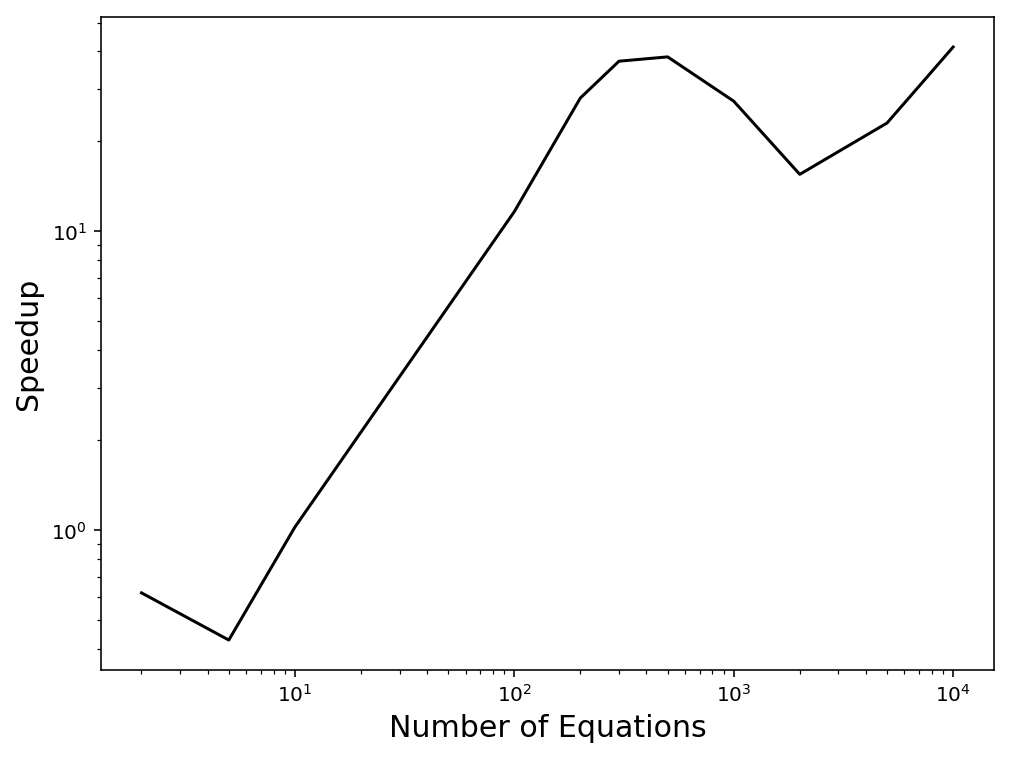

In [4]:
plt.figure(figsize=(8,6))
plt.loglog(ds,speedups,'k-')
plt.xlabel("Number of Equations",fontsize=15)
plt.ylabel("Speedup",fontsize=15)
plt.show()